# **Airbnb @ Seattle**
## Analysis of the Airbnb dataset of Seattle
The website [Inside Airbnb](http://insideairbnb.com/) collects Airbnb listings data from several cities around the world. This website mentions that _Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities._ Let's find out!

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


In [15]:
# read the listings dataset
listings = pd.read_csv('data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [16]:
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/241032,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [14]:
# verify the number of null values
null_count = listings.isna().sum().sort_values(ascending=False)
for i, v in null_count.items():
    if v > 0:
        print(i, ':', v, 'nulls')

license : 3818 nulls
square_feet : 3721 nulls
monthly_price : 2301 nulls
security_deposit : 1952 nulls
weekly_price : 1809 nulls
notes : 1606 nulls
neighborhood_overview : 1032 nulls
cleaning_fee : 1030 nulls
transit : 934 nulls
host_about : 859 nulls
host_acceptance_rate : 773 nulls
review_scores_accuracy : 658 nulls
review_scores_checkin : 658 nulls
review_scores_value : 656 nulls
review_scores_location : 655 nulls
review_scores_cleanliness : 653 nulls
review_scores_communication : 651 nulls
review_scores_rating : 647 nulls
last_review : 627 nulls
first_review : 627 nulls
reviews_per_month : 627 nulls
space : 569 nulls
host_response_rate : 523 nulls
host_response_time : 523 nulls
neighbourhood : 416 nulls
thumbnail_url : 320 nulls
medium_url : 320 nulls
xl_picture_url : 320 nulls
host_neighbourhood : 300 nulls
summary : 177 nulls
bathrooms : 16 nulls
host_location : 8 nulls
zipcode : 7 nulls
bedrooms : 6 nulls
host_name : 2 nulls
host_listings_count : 2 nulls
host_since : 2 nulls
hos

In [5]:
# plot LonLat coordinates
px.scatter_mapbox(data_frame=listings, lat='latitude', lon='longitude', zoom=7, mapbox_style='carto-positron')

In [6]:
# number of listings per neighborhood group
listings['neighbourhood_group'].value_counts().plot(kind='bar');

KeyError: 'neighbourhood_group'

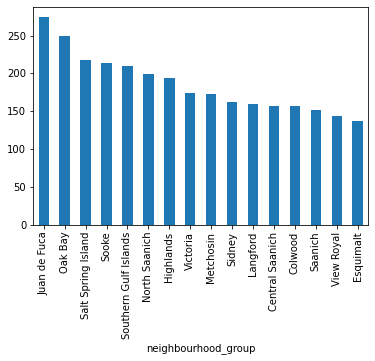

In [53]:
# average price-per-night by neighbouthoob group
listings.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).plot(kind='bar');

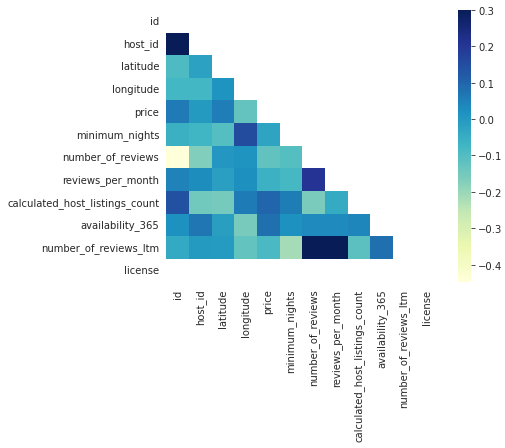

In [54]:
# correlation between variables using a heatmap
corr = listings.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=0.3, square=True, cmap='YlGnBu');

In [55]:
# listings locations
import folium
# sns.scatterplot(x=listings['longitude'], y=listings['latitude']);

# create folium map
# Note: folium needs coordinates in the order Latitude, Longitude
m = folium.Map(listings[['latitude', 'longitude']].mean().to_list(), tiles="Stamen Terrain", zoom_start=9)

# add all points
for index, row in listings.iterrows():
    folium.Marker(location=row[['latitude', 'longitude']].to_list()).add_to(m)

m